In [3]:
# import pckages
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.metrics import silhouette_score

In [4]:
# load data
iris = load_iris()

# Build k-means Model
cluster = KMeans(n_clusters = 3)
cluster.fit(iris["data"])
df = pd.DataFrame(iris["data"], columns = iris["feature_names"])
df["group"] = cluster.labels_
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),group
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
cluster.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

C:\Users\Chien Hua Lo\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


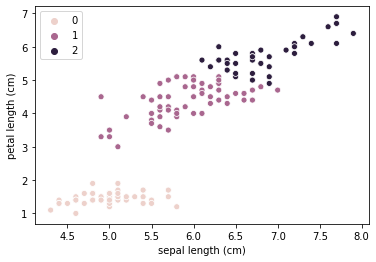

In [6]:
# plot
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.scatterplot(df["sepal length (cm)"],
                             df["petal length (cm)"],
                             hue = cluster.labels_)



In [9]:
ks = []
scores = []

for k in range(2, 11):
    cluster = KMeans(n_clusters = k)
    cluster.fit(iris["data"])
    s = silhouette_score(iris["data"], cluster.labels_)
    ks.append(k)
    scores.append(s)
    
print(ks)
print(scores)

[2, 3, 4, 5, 6, 7, 8, 9, 10]
[0.681046169211746, 0.5528190123564091, 0.49721766487109686, 0.4887488870931048, 0.365521885999545, 0.3525377852006715, 0.3574536925852705, 0.35691819487017074, 0.30196205439126017]


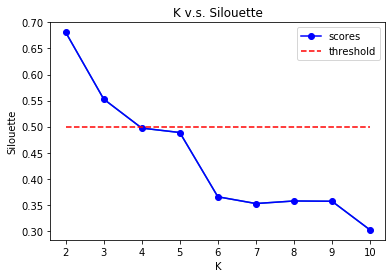

In [17]:
plt.title("K v.s. Silouette")
plt.plot(ks, scores)
plt.xlabel("K")
plt.ylabel("Silouette")
plot1, = plt.plot(ks, scores, "o-b", label = "scores")
plot2, = plt.plot(ks, [0.5]*len(ks), "--r", label = "threshold")
plt.legend(handles=[plot1, plot2])